In [ ]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("/content/WineQT.csv")

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
df.shape

(1143, 13)

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
df.skew()

fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
quality                 0.286792
Id                     -0.010419
dtype: float64

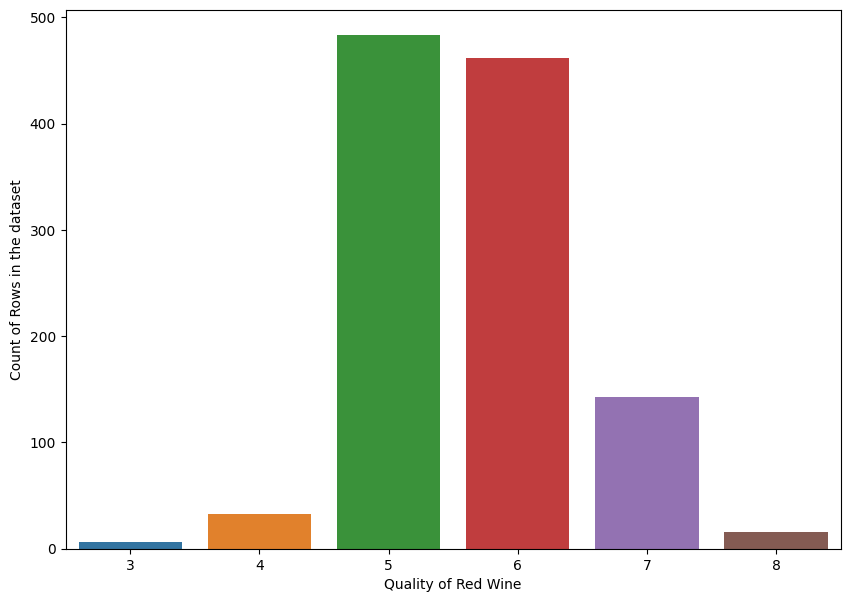

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

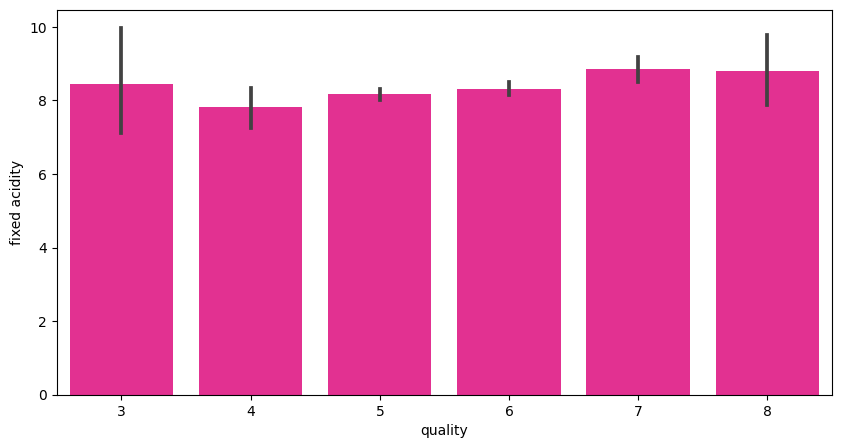

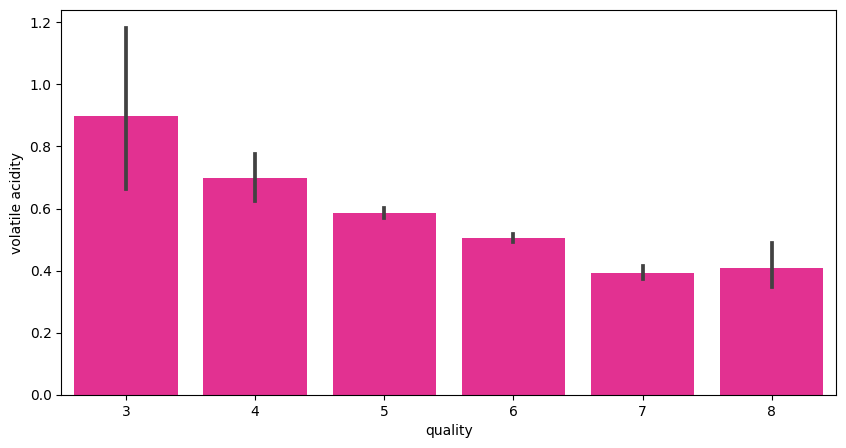

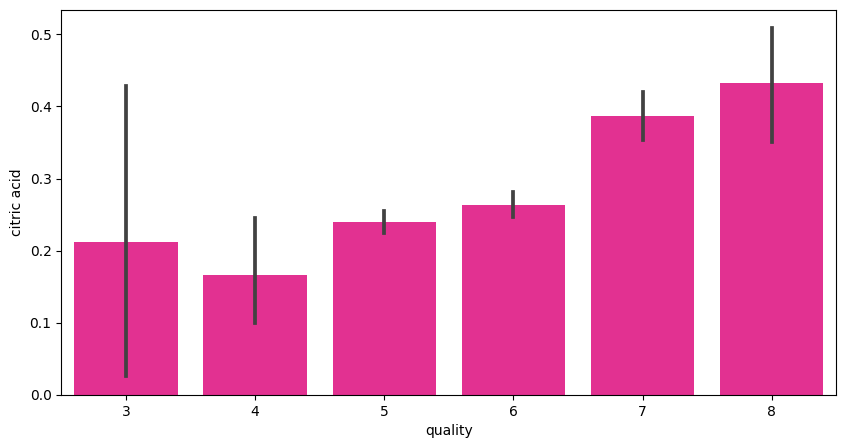

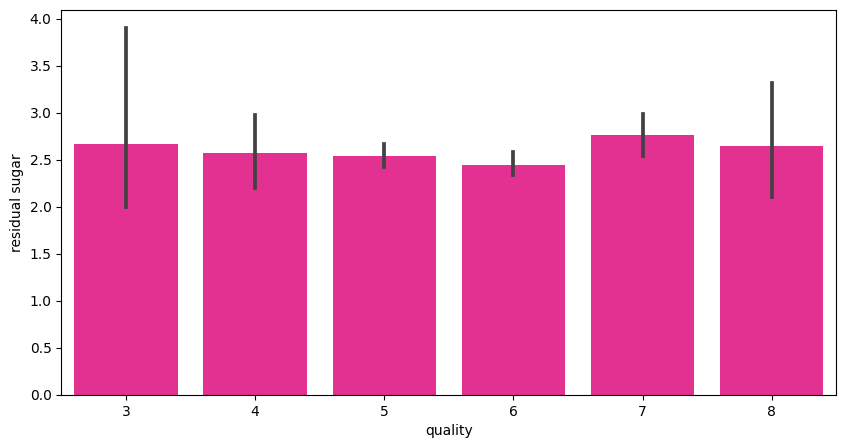

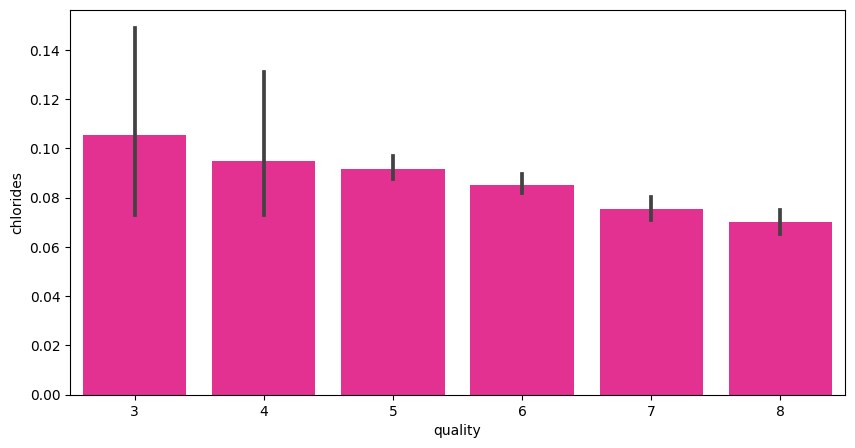

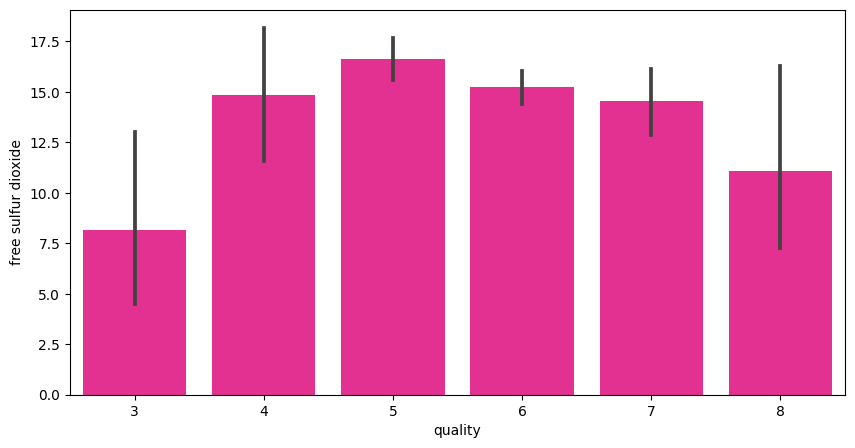

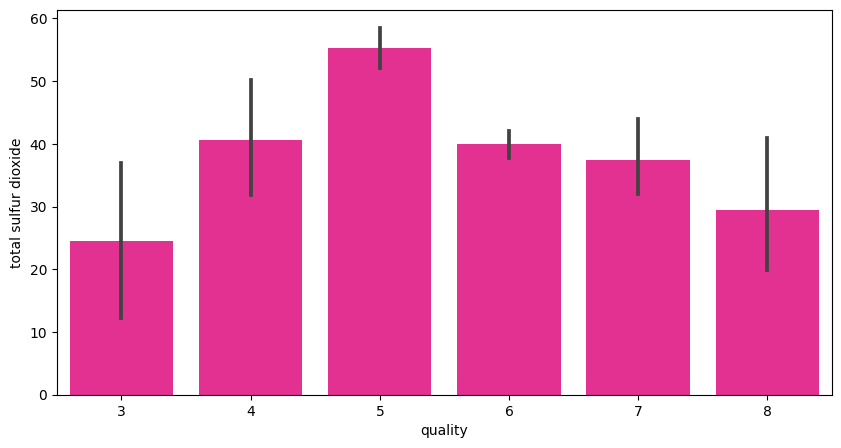

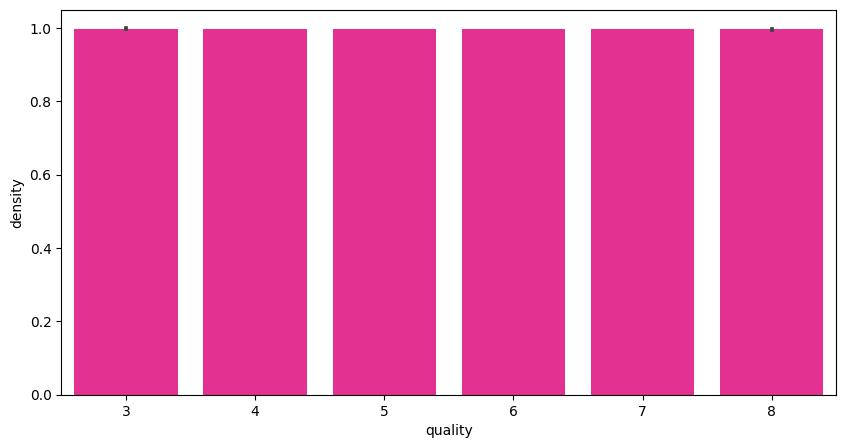

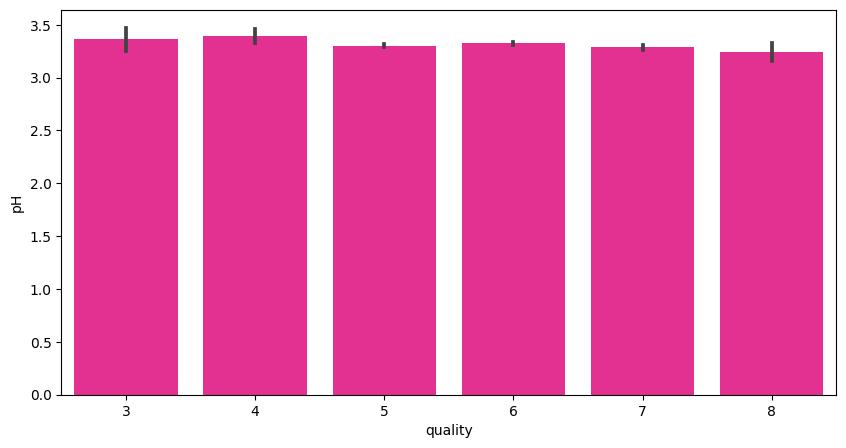

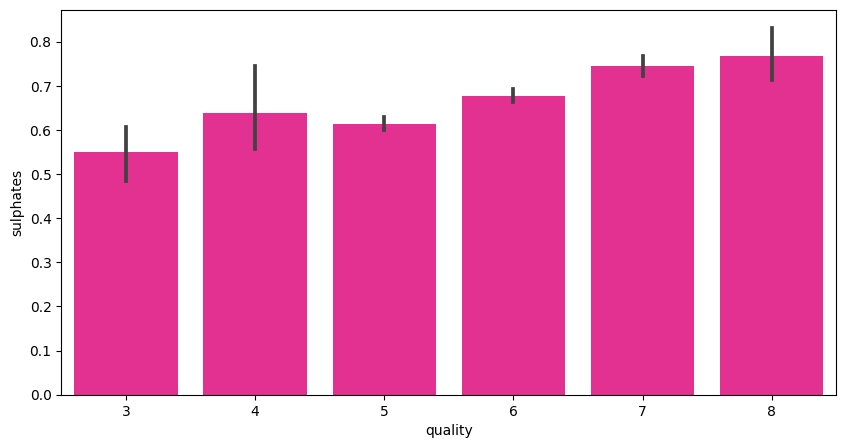

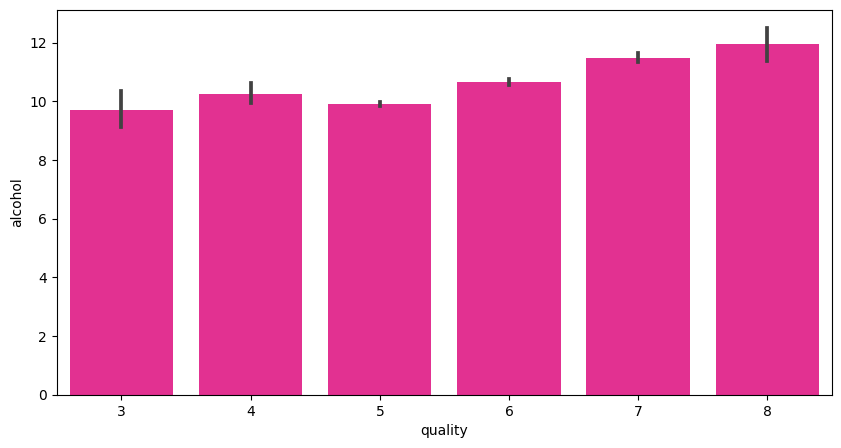

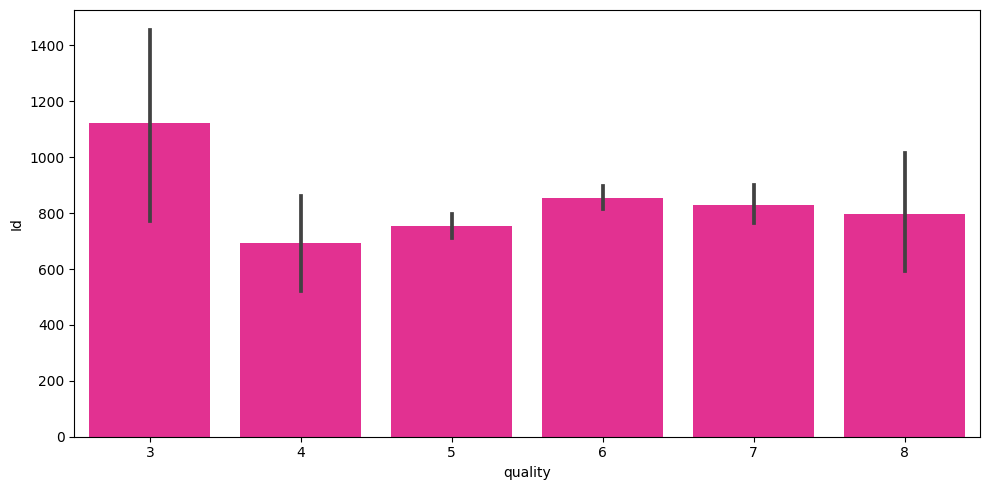

In [ ]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="deeppink")
plt.tight_layout()
plt.show()

In [ ]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
df.shape

(1143, 12)

In [ ]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
df.shape

(1048, 12)

In [ ]:
# Percentage of Data Loss

data_loss=(1599-1464)/1599*100
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

8.442776735459661

In [ ]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [ ]:
Y.value_counts()

5    443
6    428
7    132
4     30
8     15
Name: quality, dtype: int64

In [ ]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [ ]:
Y.value_counts()

5    443
6    443
7    443
4    443
8    443
Name: quality, dtype: int64

In [ ]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
2210    1
2211    1
2212    1
2213    1
2214    1
Name: quality, Length: 2215, dtype: int64

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000,1
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000,2
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000,3
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000,4
...,...,...,...,...,...,...,...,...,...,...,...
2210,8.423942,0.470141,0.389899,2.350302,0.077746,31.221273,0.992889,3.145111,0.697545,12.775655,1112
2211,8.289820,0.333293,0.399521,1.961078,0.066509,46.514963,0.994638,3.132695,0.709401,11.494611,1309
2212,7.721503,0.357650,0.352838,1.981375,0.061029,37.381290,0.994681,3.183437,0.735787,11.393125,1382
2213,6.105045,0.800486,0.097534,1.518834,0.047476,80.869953,0.992875,3.519398,0.803165,12.711846,400


In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,-0.623996,0.943971,-1.470065,-0.609242,-0.118342,-0.168657,0.817392,1.382481,-0.831503,-1.259743,-1.790182
1,-0.376212,1.907514,-1.470065,0.121324,1.108474,1.138457,0.230832,-0.732305,0.059703,-0.893783,-1.787984
2,-0.376212,1.265152,-1.265959,-0.191776,0.773888,0.623533,0.348144,-0.322991,-0.163098,-0.893783,-1.785787
3,1.729946,-1.304295,1.387427,-0.609242,-0.174106,0.861190,0.934704,-1.005180,-0.682969,-0.893783,-1.783590
4,-0.623996,0.943971,-1.470065,-0.609242,-0.118342,-0.168657,0.817392,1.382481,-0.831503,-1.259743,-1.781392
...,...,...,...,...,...,...,...,...,...,...,...
2210,0.010293,-0.286467,0.519460,-0.139277,-0.020951,-0.278721,-2.063253,-1.106752,0.190008,1.828646,0.653205
2211,-0.072789,-1.019014,0.568556,-0.545497,-0.647602,0.327054,-1.037154,-1.191454,0.278058,0.656617,1.086072
2212,-0.424838,-0.888634,0.330347,-0.524314,-0.953202,-0.034726,-1.012153,-0.845294,0.474021,0.563769,1.246474
2213,-1.426166,1.481873,-0.972384,-1.007052,-1.708980,1.687839,-2.071215,1.446595,0.974416,1.770267,-0.911265


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [ ]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

    # Training the model
    model.fit(X_train, Y_train)

    # Predicting Y_test
    pred = model.predict(X_test)

    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)

    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)

    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)

    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [ ]:
model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 90.74492099322799

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       254
           1       0.88      0.90      0.89       189

    accuracy                           0.91       443
   macro avg       0.90      0.91      0.91       443
weighted avg       0.91      0.91      0.91       443

Cross Validation Score: 86.41083521444696

Accuracy Score - Cross Validation Score is 4.334085778781031


In [ ]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 95.93679458239278

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       254
           1       0.96      0.94      0.95       189

    accuracy                           0.96       443
   macro avg       0.96      0.96      0.96       443
weighted avg       0.96      0.96      0.96       443

Cross Validation Score: 88.9841986455982

Accuracy Score - Cross Validation Score is 6.95259593679458


In [ ]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 90.29345372460497

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       254
           1       0.92      0.85      0.88       189

    accuracy                           0.90       443
   macro avg       0.91      0.90      0.90       443
weighted avg       0.90      0.90      0.90       443

Cross Validation Score: 84.37923250564333

Accuracy Score - Cross Validation Score is 5.914221218961643


In [ ]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 95.93679458239278

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       254
           1       0.95      0.95      0.95       189

    accuracy                           0.96       443
   macro avg       0.96      0.96      0.96       443
weighted avg       0.96      0.96      0.96       443

Cross Validation Score: 90.8803611738149

Accuracy Score - Cross Validation Score is 5.056433408577874


In [ ]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 91.87358916478556

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       254
           1       0.88      0.93      0.91       189

    accuracy                           0.92       443
   macro avg       0.92      0.92      0.92       443
weighted avg       0.92      0.92      0.92       443

Cross Validation Score: 86.72686230248307

Accuracy Score - Cross Validation Score is 5.146726862302486


In [ ]:
model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 95.71106094808127

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       254
           1       0.95      0.95      0.95       189

    accuracy                           0.96       443
   macro avg       0.96      0.96      0.96       443
weighted avg       0.96      0.96      0.96       443

Cross Validation Score: 91.55756207674945

Accuracy Score - Cross Validation Score is 4.15349887133182


In [ ]:
model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 96.16252821670429

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       254
           1       0.95      0.96      0.96       189

    accuracy                           0.96       443
   macro avg       0.96      0.96      0.96       443
weighted avg       0.96      0.96      0.96       443

Cross Validation Score: 88.84875846501129

Accuracy Score - Cross Validation Score is 7.313769751693002


In [ ]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 95.93679458239278


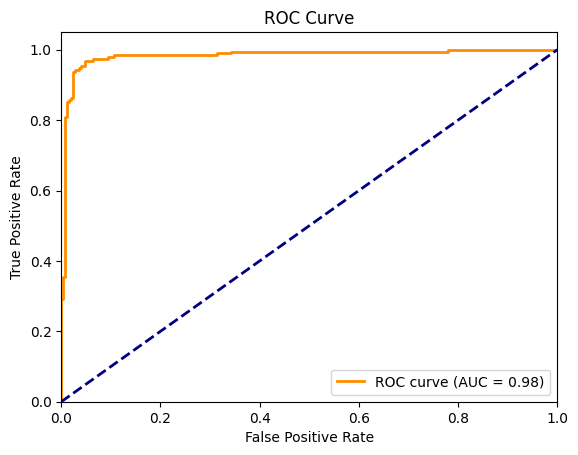

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Final_Model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, Final_Model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


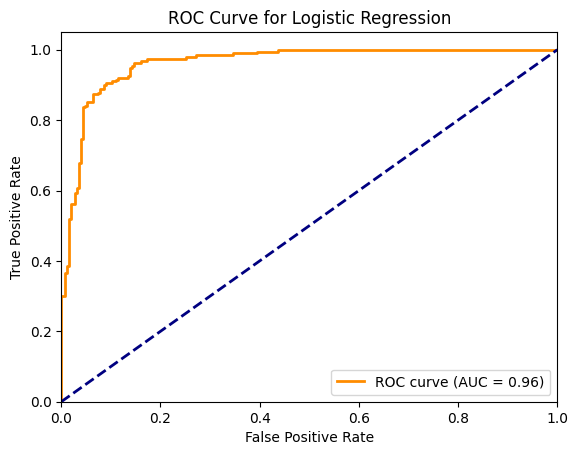

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Create and train a logistic regression model
logistic_model = LogisticRegression(random_state=21)
logistic_model.fit(X_train, Y_train)

# Calculate ROC curve and AUC for the logistic regression model
fpr, tpr, thresholds = roc_curve(Y_test, logistic_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

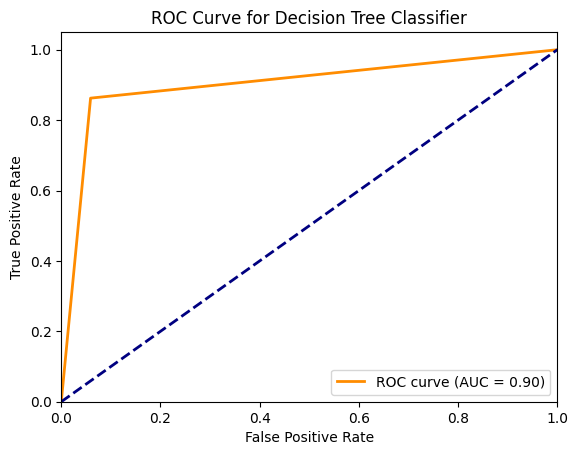

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=21)
decision_tree_model.fit(X_train, Y_train)

# Calculate ROC curve and AUC for the Decision Tree Classifier
fpr, tpr, thresholds = roc_curve(Y_test, decision_tree_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()


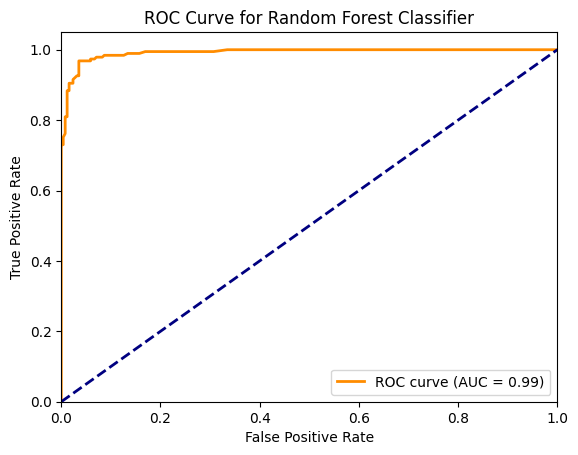

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=21)
random_forest_model.fit(X_train, Y_train)

# Calculate ROC curve and AUC for the Random Forest Classifier
fpr, tpr, thresholds = roc_curve(Y_test, random_forest_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


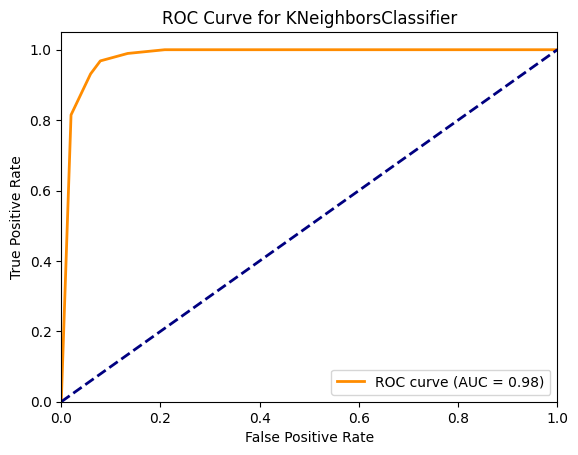

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Create and train a KNeighborsClassifier
k_neighbors_model = KNeighborsClassifier()
k_neighbors_model.fit(X_train, Y_train)

# Calculate ROC curve and AUC for the KNeighborsClassifier
fpr, tpr, thresholds = roc_curve(Y_test, k_neighbors_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, k_neighbors_model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend(loc='lower right')
plt.show()


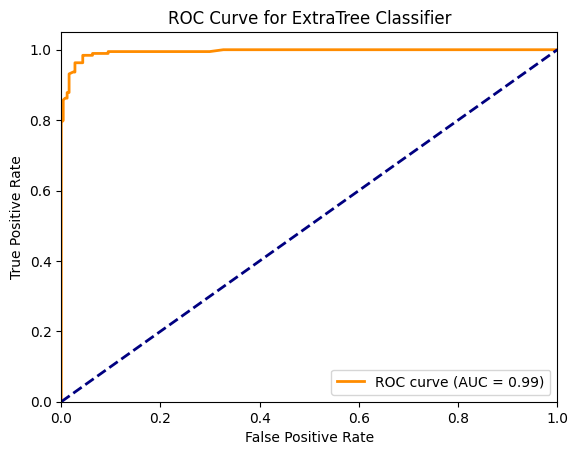

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier

# Create and train an ExtraTree Classifier
extra_tree_model = ExtraTreesClassifier(random_state=21)
extra_tree_model.fit(X_train, Y_train)

# Calculate ROC curve and AUC for the ExtraTree Classifier
fpr, tpr, thresholds = roc_curve(Y_test, extra_tree_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, extra_tree_model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ExtraTree Classifier')
plt.legend(loc='lower right')
plt.show()


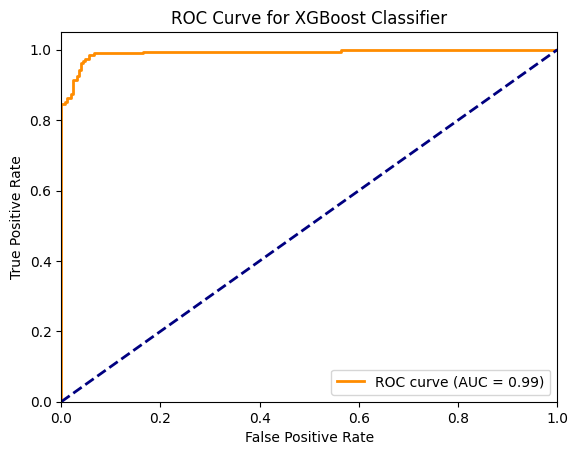

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier

# Create and train an XGBoost Classifier
xgb_model = XGBClassifier(random_state=21)
xgb_model.fit(X_train, Y_train)

# Calculate ROC curve and AUC for the XGBoost Classifier
fpr, tpr, thresholds = roc_curve(Y_test, xgb_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB  # Import the appropriate Naive Bayes class

# Create and initialize the Naive Bayes model (Gaussian Naive Bayes in this example)
naive_bayes_model = GaussianNB()

# Call the classify function with the Naive Bayes model
classify(naive_bayes_model, X, Y)

Accuracy Score: 86.90744920993228

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       254
           1       0.83      0.87      0.85       189

    accuracy                           0.87       443
   macro avg       0.87      0.87      0.87       443
weighted avg       0.87      0.87      0.87       443

Cross Validation Score: 84.10835214446954

Accuracy Score - Cross Validation Score is 2.799097065462746


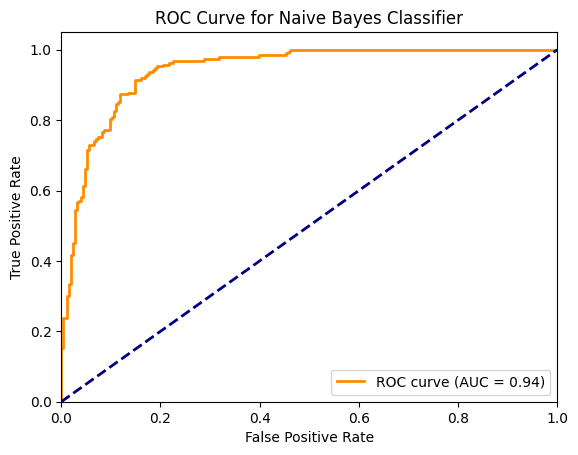

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB  # Import the appropriate Naive Bayes class

# Create and train a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, Y_train)

# Calculate ROC curve and AUC for the Naive Bayes model
fpr, tpr, thresholds = roc_curve(Y_test, naive_bayes_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()
